<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 168.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 152.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 130.6 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-09-03 17:51:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.8MB/s    in 2.5s    

2025-09-03 17:51:43 (60.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [3]:
##Write your code here
def convert_age_to_numeric(age):
    if age == 'Under 18 years old':
        return 17
    elif age == '18-24 years old':
        return (18 + 24) / 2
    elif age == '25-34 years old':
        return (25 + 34) / 2
    elif age == '35-44 years old':
        return (35 + 44) / 2
    elif age == '45-54 years old':
        return (45 + 54) / 2
    elif age == '55-64 years old':
        return (55 + 64) / 2
    elif age == '65 years or older':
        return 70
    elif age == "Prefer not to say":
        return 29.5
    else:
        return None

# Apply the function to the Age column to create Age_numeric
df['Age_numerical'] = df['Age'].apply(convert_age_to_numeric)
print(df['Age_numerical'].dtypes)

float64


In [4]:
df['SOPartFreq'].describe()

count                                   45237
unique                                      6
top       Less than once per month or monthly
freq                                    24162
Name: SOPartFreq, dtype: object

In [5]:
df['SOPartFreq'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: SOPartFreq
Non-Null Count  Dtype 
--------------  ----- 
45237 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [6]:
df['SOPartFreq'].value_counts()

SOPartFreq
Less than once per month or monthly                   24162
I have never participated in Q&A on Stack Overflow    11143
A few times per month or weekly                        6277
A few times per week                                   2278
Daily or almost daily                                   936
Multiple times per day                                  441
Name: count, dtype: int64

In [7]:
median_jobsat = df['JobSat'].median()
df.loc[df['JobSat'].isna(), 'JobSat'] = median_jobsat

In [8]:
df['SOPartFreq'].isnull().sum()

np.int64(20200)

In [9]:
# Mapping the categories to numerical values
frequency_mapping = {
    'Less than once per month or monthly': 1,
    'I have never participated in Q&A on Stack Overflow': 0,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}

# Converting the categorical variable to numerical
df['SOPartFreq_Numerical'] = df['SOPartFreq'].replace(frequency_mapping)

/tmp/ipykernel_304/2210663498.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SOPartFreq_Numerical'] = df['SOPartFreq'].replace(frequency_mapping)


In [10]:
df['SOPartFreq_Numerical'].dtypes

dtype('float64')

In [11]:
median_SOPartFreq_Numerical = df['SOPartFreq_Numerical'].median()
df.loc[df['SOPartFreq_Numerical'].isna(), 'SOPartFreq_Numerical'] = median_SOPartFreq_Numerical

In [12]:
Age_freq_jobsat = df.loc[:, ['Age_numerical', 'SOPartFreq_Numerical', 'JobSat']]

In [13]:
Age_freq_jobsat.isnull().sum()

Age_numerical           0
SOPartFreq_Numerical    0
JobSat                  0
dtype: int64

In [14]:
Age_freq_jobsat.sample(5)

,Age_numerical,SOPartFreq_Numerical,JobSat
61953,39.5,1.0,7.0
18859,49.5,1.0,7.0
815,29.5,1.0,7.0
48861,21.0,0.0,7.0
43170,49.5,1.0,7.0


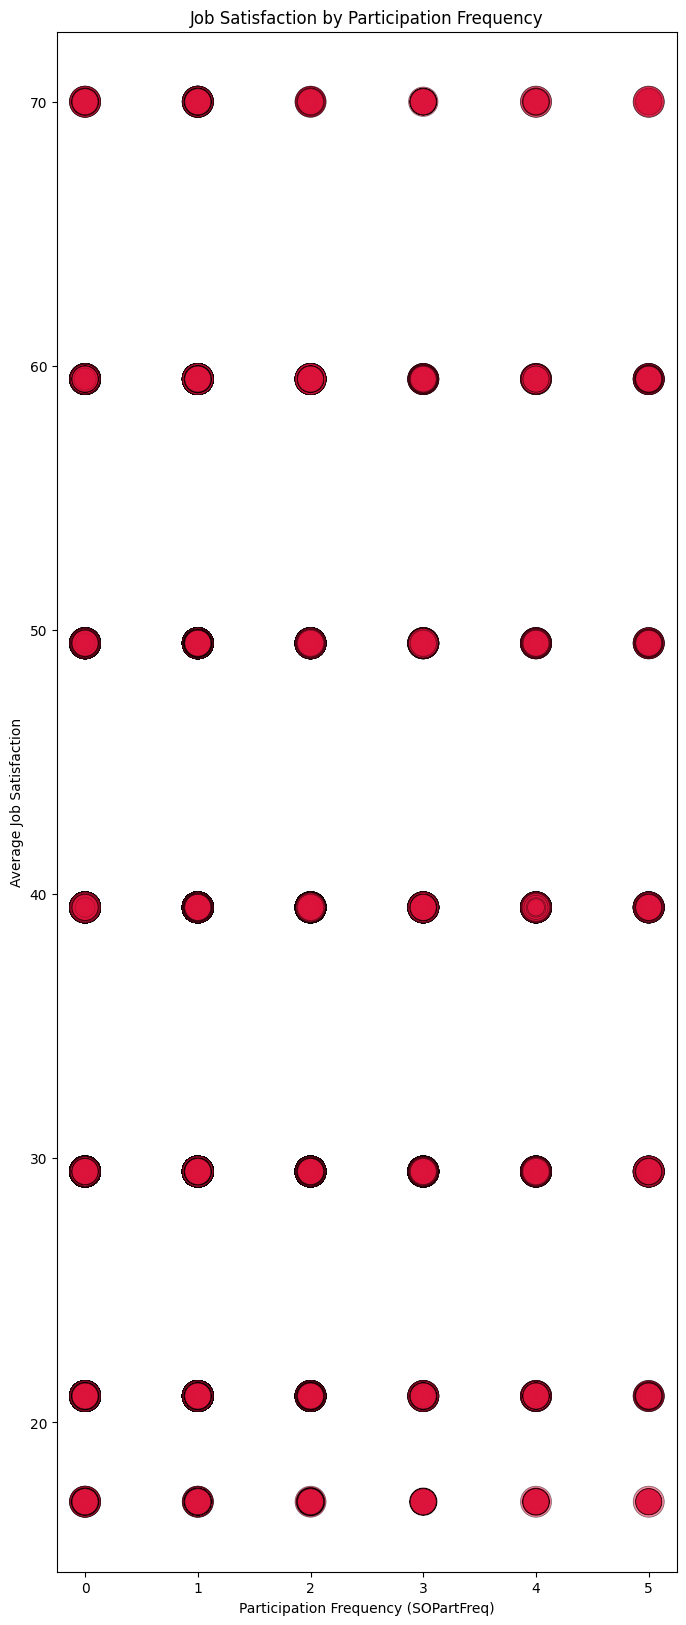

In [15]:
plt.figure(figsize=(8, 20))
plt.scatter(Age_freq_jobsat['SOPartFreq_Numerical'], Age_freq_jobsat['Age_numerical'], 
            s=Age_freq_jobsat['JobSat'] * 50+1,  # Adjust the scaling factor as needed
            alpha=0.5, color='crimson', edgecolor='black', linewidth=0.5)  # Add black outline
plt.title('Job Satisfaction by Participation Frequency')
plt.xlabel('Participation Frequency (SOPartFreq)')
plt.ylabel('Average Job Satisfaction')
plt.show()

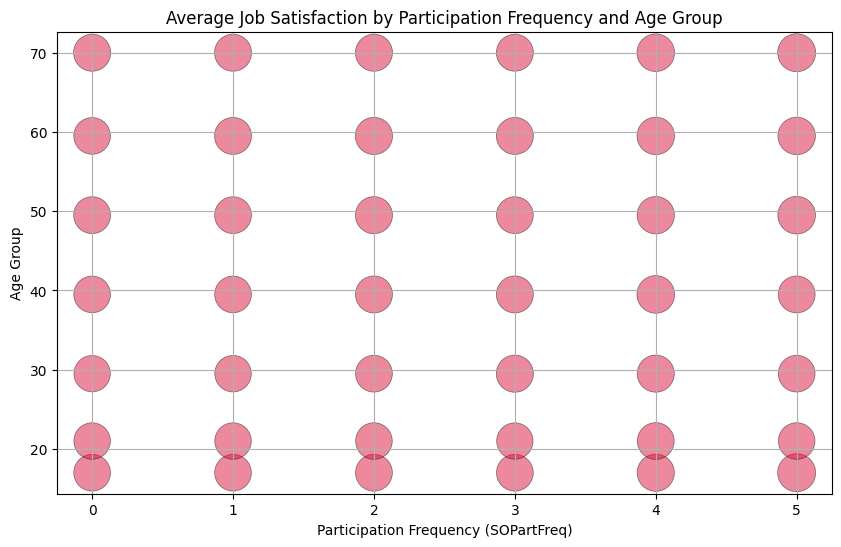

In [16]:

# Group by age group and participation frequency, calculating average JobSat
grouped_data = Age_freq_jobsat.groupby(['Age_numerical', 'SOPartFreq_Numerical']).agg({'JobSat': 'mean'}).reset_index()

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['SOPartFreq_Numerical'], grouped_data['Age_numerical'], 
            s=grouped_data['JobSat'] * 100,  # Scale the size of the bubbles
            alpha=0.5, color='crimson', edgecolor='black', linewidth=0.5)

plt.title('Average Job Satisfaction by Participation Frequency and Age Group')
plt.xlabel('Participation Frequency (SOPartFreq)')
plt.ylabel('Age Group')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [17]:
import numpy as np

In [18]:
##Write your code here
# Calculate the logarithm and assign it using .loc
df.loc[:, 'Log_CompTotal'] = np.log(df['ConvertedCompYearly'] + 1)  # Adding 1 to avoid log(0)

median_converted_comp_yearly = df['Log_CompTotal'].median()

# Fill NaN values in 'ConvertedYearlyComp' with the calculated mean
df.loc[df['Log_CompTotal'].isna(), 'Log_CompTotal'] = median_converted_comp_yearly

# Display the updated DataFrame
print(df['Log_CompTotal'].sample(10))
print(df['Log_CompTotal'].isnull().sum())

17670    11.082158
25444     8.368229
12776     9.785436
62556    11.082158
46225    11.082158
51942    11.082158
14382    11.082158
32608    11.361242
23128    11.082158
19306    11.736077
Name: Log_CompTotal, dtype: float64
0


In [19]:
 Comp_Age_Sat= df.loc[:, ['Age_numerical', 'Log_CompTotal', 'JobSat']]
Comp_Age_Sat.sample(10)

,Age_numerical,Log_CompTotal,JobSat
62153,21.0,11.082158,7.0
16494,29.5,12.197027,7.0
16765,29.5,10.954851,8.0
39180,21.0,6.052089,7.0
30079,29.5,11.082158,7.0
3815,29.5,10.855956,9.0
55403,39.5,11.082158,7.0
53837,21.0,11.082158,9.0
52508,29.5,11.082158,7.0
58562,29.5,11.082158,7.0


In [20]:
import pandas as pd

# Assuming df is your original DataFrame containing the 'Age' column
age_group_data = df['Age'].value_counts()

# Convert the Series to a DataFrame
age_group_df = age_group_data.reset_index()

# Rename the columns for clarity
age_group_df.columns = ['Age_Group', 'Count']

# Display the resulting DataFrame
print(age_group_df)

            Age_Group  Count
0     25-34 years old  23911
1     35-44 years old  14942
2     18-24 years old  14098
3     45-54 years old   6249
4     55-64 years old   2575
5  Under 18 years old   2568
6   65 years or older    772
7   Prefer not to say    322


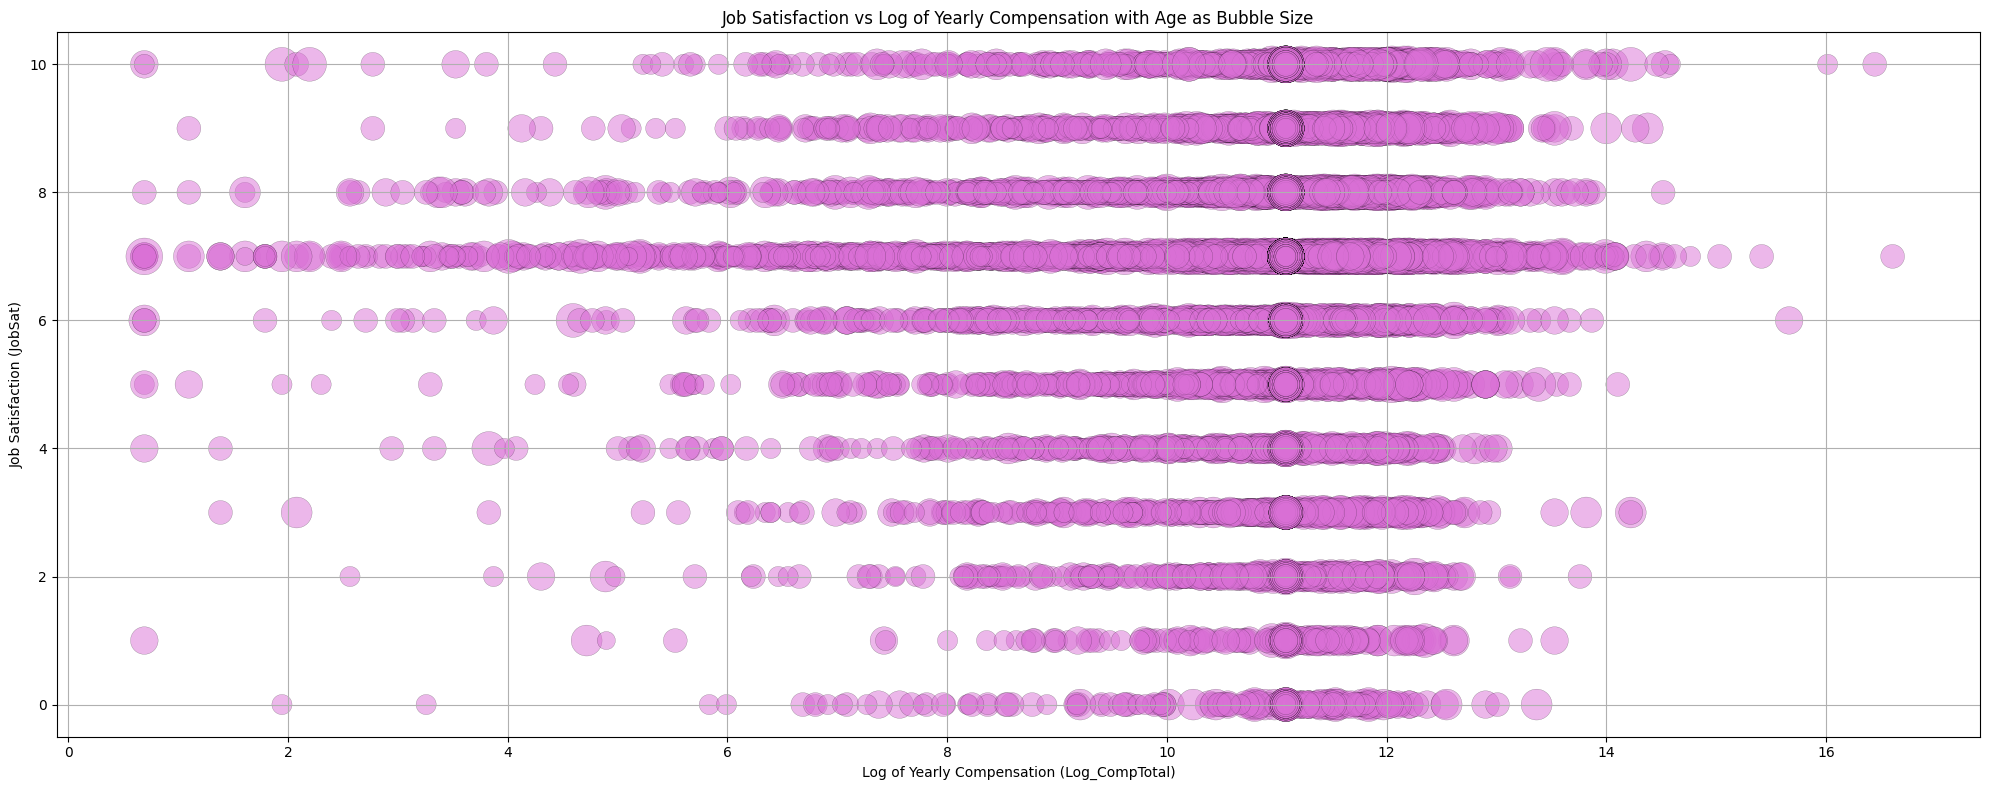

In [21]:
# Create bubble sizes based on age (you can adjust the scaling factor as needed)
Comp_Age_Sat['Bubble_Size'] = Comp_Age_Sat['Age_numerical'] * 10  # Scale the size for better visualization

# Create the bubble plot
plt.figure(figsize=(20, 8))
plt.scatter(Comp_Age_Sat['Log_CompTotal'], Comp_Age_Sat['JobSat'], 
            s=Comp_Age_Sat['Bubble_Size'],  # Use the mapped bubble sizes
            alpha=0.5, color='orchid', edgecolor='black', linewidth=0.2)

# Adding labels and title
plt.title('Job Satisfaction vs Log of Yearly Compensation with Age as Bubble Size')
plt.xlabel('Log of Yearly Compensation (Log_CompTotal)')
plt.ylabel('Job Satisfaction (JobSat)')
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [22]:
##Write your code here

Lang_Age = df.loc[:, ['LanguageHaveWorkedWith', 'Age', 'Age_numerical']]
print(Lang_Age.sample(9))

                                  LanguageHaveWorkedWith                 Age  \
43382                                                NaN     25-34 years old   
51320                                          Swift;VBA     45-54 years old   
11632  Bash/Shell (all shells);C;C++;Go;HTML/CSS;Java...     25-34 years old   
28007          Bash/Shell (all shells);C#;PHP;PowerShell  Under 18 years old   
44590                                  C++;Go;Python;SQL     35-44 years old   
48446                                  Java;Python;R;VBA     25-34 years old   
46072                            HTML/CSS;JavaScript;SQL     45-54 years old   
32284                                  Perl;Python;R;SQL     18-24 years old   
4887                   Go;HTML/CSS;JavaScript;TypeScript     25-34 years old   

       Age_numerical  
43382           29.5  
51320           49.5  
11632           29.5  
28007           17.0  
44590           39.5  
48446           29.5  
46072           49.5  
32284          

In [23]:
# Step 1: Explode the Language combinations into separate rows
Lang_Age['LanguageHaveWorkedWith'] = Lang_Age['LanguageHaveWorkedWith'].str.split(';')
Lang_Sat_exploded = Lang_Age.explode('LanguageHaveWorkedWith')

# Step 2: Count language popularity
language_popularity = Lang_Sat_exploded['LanguageHaveWorkedWith'].value_counts().reset_index()
language_popularity.columns = ['Language', 'TotalCount']

# Display the results
print("Exploded DataFrame:")
print(Lang_Sat_exploded)
print("\nLanguage Popularity:")
print(language_popularity)

Exploded DataFrame:
        LanguageHaveWorkedWith                 Age  Age_numerical
0                          NaN  Under 18 years old           17.0
1      Bash/Shell (all shells)     35-44 years old           39.5
1                           Go     35-44 years old           39.5
1                     HTML/CSS     35-44 years old           39.5
1                         Java     35-44 years old           39.5
...                        ...                 ...            ...
65436                     Java     18-24 years old           21.0
65436               JavaScript     18-24 years old           21.0
65436                      PHP     18-24 years old           21.0
65436                   Python     18-24 years old           21.0
65436               TypeScript     18-24 years old           21.0

[327925 rows x 3 columns]

Language Popularity:
                   Language  TotalCount
0                JavaScript       37492
1                  HTML/CSS       31816
2                  

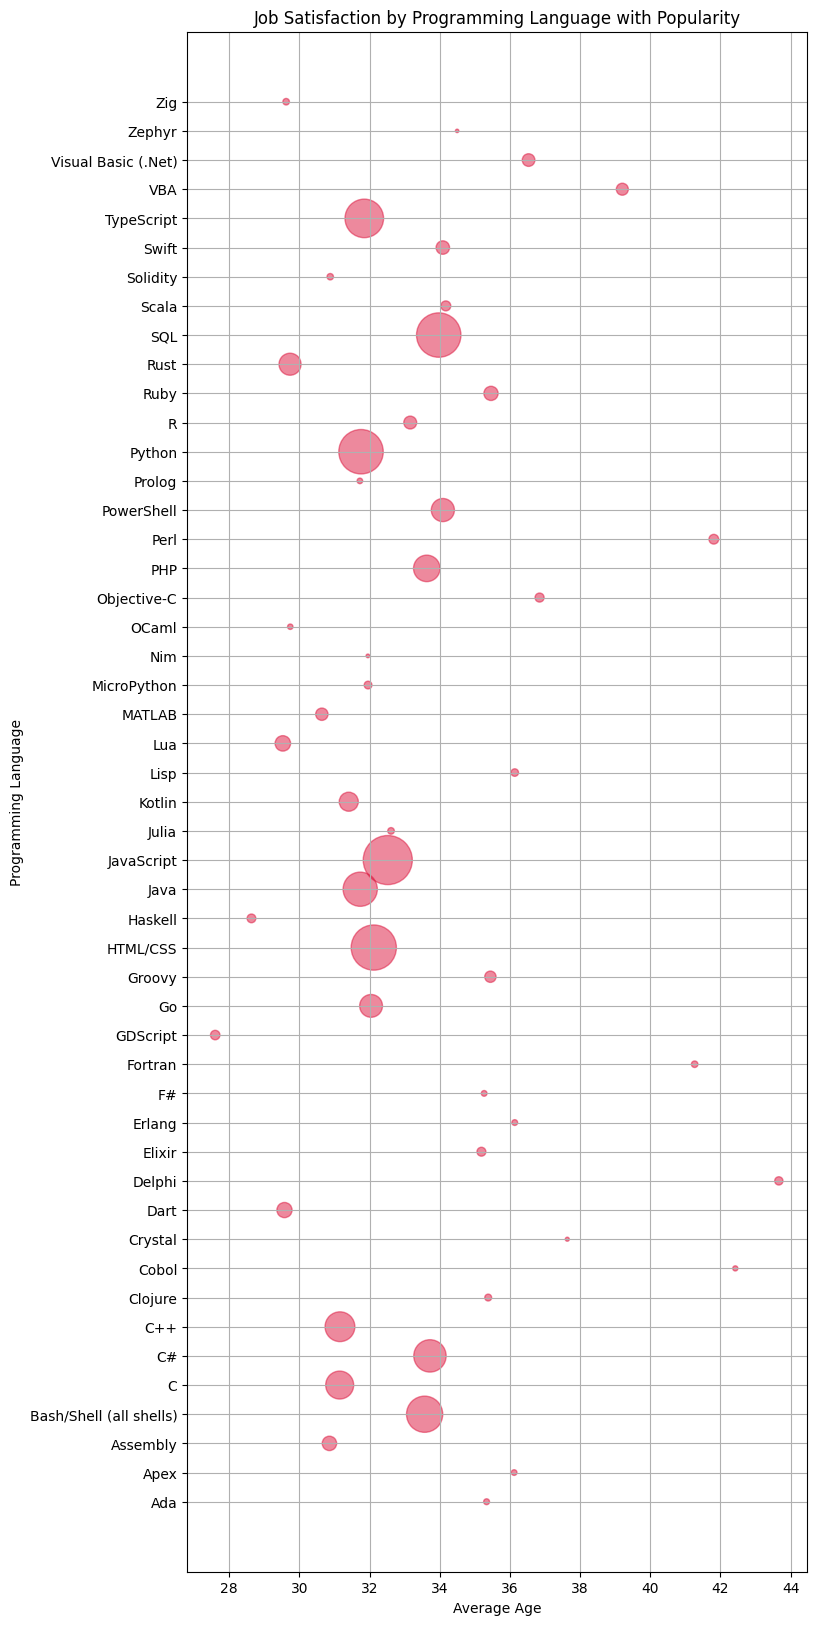

In [24]:
# Calculate average JobSat for each language
ave_age = Lang_Sat_exploded.groupby('LanguageHaveWorkedWith')['Age_numerical'].mean().reset_index()

#  Merge the two DataFrames on the Language column using an outer join
merged_df = pd.merge(ave_age, language_popularity, left_on='LanguageHaveWorkedWith', right_on='Language', how='outer')

# Step 3: Create a horizontal bubble plot
plt.figure(figsize=(8, 20))
plt.scatter(merged_df['Age_numerical'], merged_df['Language'], 
            s=merged_df['TotalCount'] / 30, alpha=0.5, color='crimson')  # Bubble size scaled by TotalCount
plt.title('Job Satisfaction by Programming Language with Popularity')
plt.xlabel('Average Age')
plt.ylabel('Programming Language')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [25]:

# Assuming df is your original DataFrame containing the 'Age' column
db_group_data=df['DatabaseWantToWorkWith'].value_counts()

# Convert the Series to a DataFrame
db_group_df = db_group_data.reset_index()

# Rename the columns for clarity
db_group_df.columns = ['Db_Group', 'Count']

# Display the resulting DataFrame
print(db_group_df)

                                               Db_Group  Count
0                                            PostgreSQL   3738
1                                     PostgreSQL;SQLite   1533
2                                                SQLite   1476
3                                  Microsoft SQL Server   1431
4                                                 MySQL   1139
...                                                 ...    ...
8473          Clickhouse;MariaDB;MySQL;PostgreSQL;Redis      1
8474  MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...      1
8475            DuckDB;Elasticsearch;MongoDB;PostgreSQL      1
8476  H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQ...      1
8477  BigQuery;Cassandra;Firebase Realtime Database;...      1

[8478 rows x 2 columns]


In [26]:
Db_Sat = df.loc[:,['DatabaseWantToWorkWith', 'JobSat']]
Db_Sat.isnull().sum()

DatabaseWantToWorkWith    22879
JobSat                        0
dtype: int64

In [27]:
Db_Sat.loc[Db_Sat['DatabaseWantToWorkWith'].isna(), 'DatabaseWantToWorkWith'] = 'PostgreSQL'
Db_Sat.isnull().sum()

DatabaseWantToWorkWith    0
JobSat                    0
dtype: int64

In [28]:
# Step 1: Explode the Language combinations into separate rows
Db_Sat['DatabaseWantToWorkWith'] = Db_Sat['DatabaseWantToWorkWith'].str.split(';')
Db_Sat_exploded = Db_Sat.explode('DatabaseWantToWorkWith')

# Step 2: Count language popularity
db_popularity = Db_Sat_exploded['DatabaseWantToWorkWith'].value_counts().reset_index()
db_popularity.columns = ['Db', 'TotalCount']

# Display the results
print("Exploded DataFrame:")
print(Db_Sat_exploded)
print("\nLanguage Popularity:")
print(db_popularity)

Exploded DataFrame:
           DatabaseWantToWorkWith  JobSat
0                      PostgreSQL     7.0
1                      PostgreSQL     7.0
2      Firebase Realtime Database     7.0
3                         MongoDB     7.0
3                           MySQL     7.0
...                           ...     ...
65435                  PostgreSQL     7.0
65435                      SQLite     7.0
65436                     MongoDB     7.0
65436                       MySQL     7.0
65436                  PostgreSQL     7.0

[150318 rows x 2 columns]

Language Popularity:
                            Db  TotalCount
0                   PostgreSQL       46884
1                       SQLite       13489
2                        MySQL       12269
3                      MongoDB       10982
4                        Redis       10847
5         Microsoft SQL Server        7905
6                Elasticsearch        6246
7                      MariaDB        5947
8                     Dynamodb        35

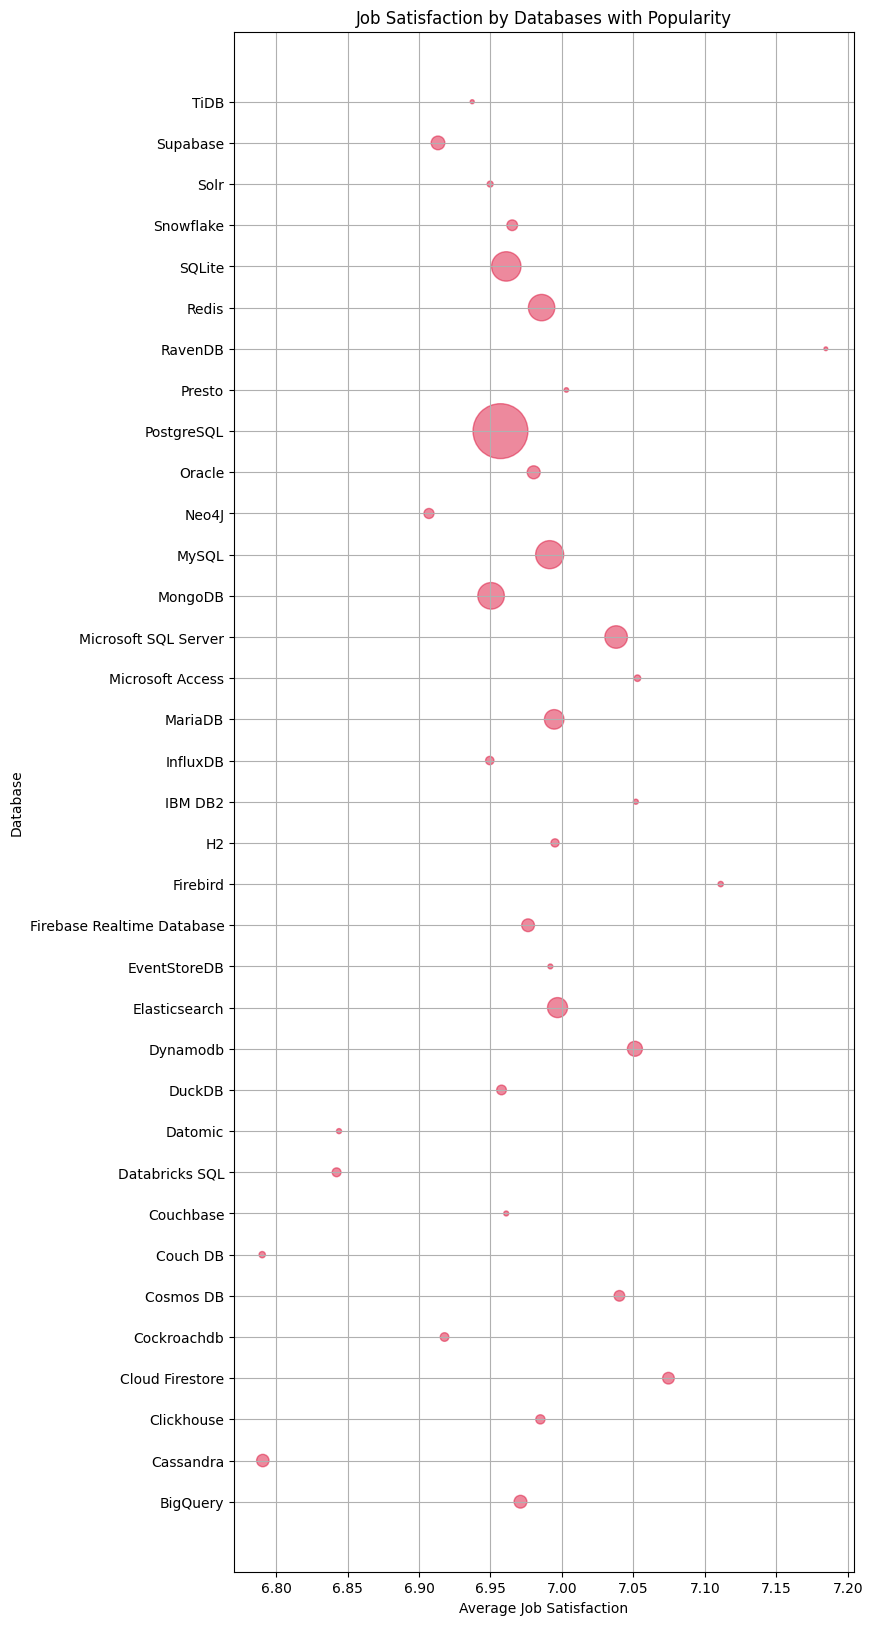

In [29]:
##Write your code here
# Calculate average JobSat for each language
ave_sat = Db_Sat_exploded.groupby('DatabaseWantToWorkWith')['JobSat'].mean().reset_index()

#  Merge the two DataFrames on the Language column using an outer join
merged_df = pd.merge(ave_sat, db_popularity, left_on='DatabaseWantToWorkWith', right_on='Db', how='outer')

# Step 3: Create a horizontal bubble plot
plt.figure(figsize=(8, 20))
plt.scatter(merged_df['JobSat'], merged_df['Db'], 
            s=merged_df['TotalCount'] / 30, alpha=0.5, color='crimson')  # Bubble size scaled by TotalCount
plt.title('Job Satisfaction by Databases with Popularity')
plt.xlabel('Average Job Satisfaction')
plt.ylabel('Database')
plt.grid(True)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [30]:
##Write your code here
Comp_Type_Sat = df.loc[:,['ConvertedCompYearly', 'DevType', 'JobSat']]
Comp_Type_Sat.sample(15)

,ConvertedCompYearly,DevType,JobSat
12873,NaN,"Developer, back-end",10.0
36971,NaN,"Developer, back-end",7.0
63745,NaN,NaN,7.0
62227,NaN,DevOps specialist,7.0
50276,NaN,"Developer, back-end",7.0
395,121018.0,Other (please specify):,7.0
39016,126880.0,"Developer, desktop or enterprise applications",7.0
47632,NaN,"Senior Executive (C-Suite, VP, etc.)",9.0
8672,NaN,"Engineer, site reliability",9.0
10281,64178.0,Other (please specify):,7.0


In [31]:
Comp_Type_Sat.isnull().sum()

ConvertedCompYearly    42002
DevType                 5992
JobSat                     0
dtype: int64

In [32]:
Comp_Type_Sat = Comp_Type_Sat.dropna(subset=['DevType'])

In [33]:
# Step 1: Explode the Language combinations into separate rows
Comp_Type_Sat['DevType'] = Comp_Type_Sat['DevType'].str.split(',')
Type_exploded = Comp_Type_Sat.explode('DevType')

# Step 2: Count language popularity
Type_popularity = Type_exploded['DevType'].value_counts().reset_index()
Type_popularity.columns = ['DevType', 'TotalCount']

# Display the results
print("Exploded DataFrame:")
print(Type_exploded)
print("\nLanguage Popularity:")
print(Type_popularity)

Exploded DataFrame:
       ConvertedCompYearly               DevType  JobSat
1                      NaN             Developer     7.0
1                      NaN            full-stack     7.0
2                      NaN  Developer Experience     7.0
3                      NaN             Developer     7.0
3                      NaN            full-stack     7.0
...                    ...                   ...     ...
65432                  NaN            Blockchain     7.0
65434                  NaN             Developer     7.0
65434                  NaN                mobile     7.0
65435                  NaN             Developer     7.0
65435                  NaN              back-end     7.0

[100877 rows x 3 columns]

Language Popularity:
                                          DevType  TotalCount
0                                       Developer       39448
1                                      full-stack       18260
2                                        back-end        9928

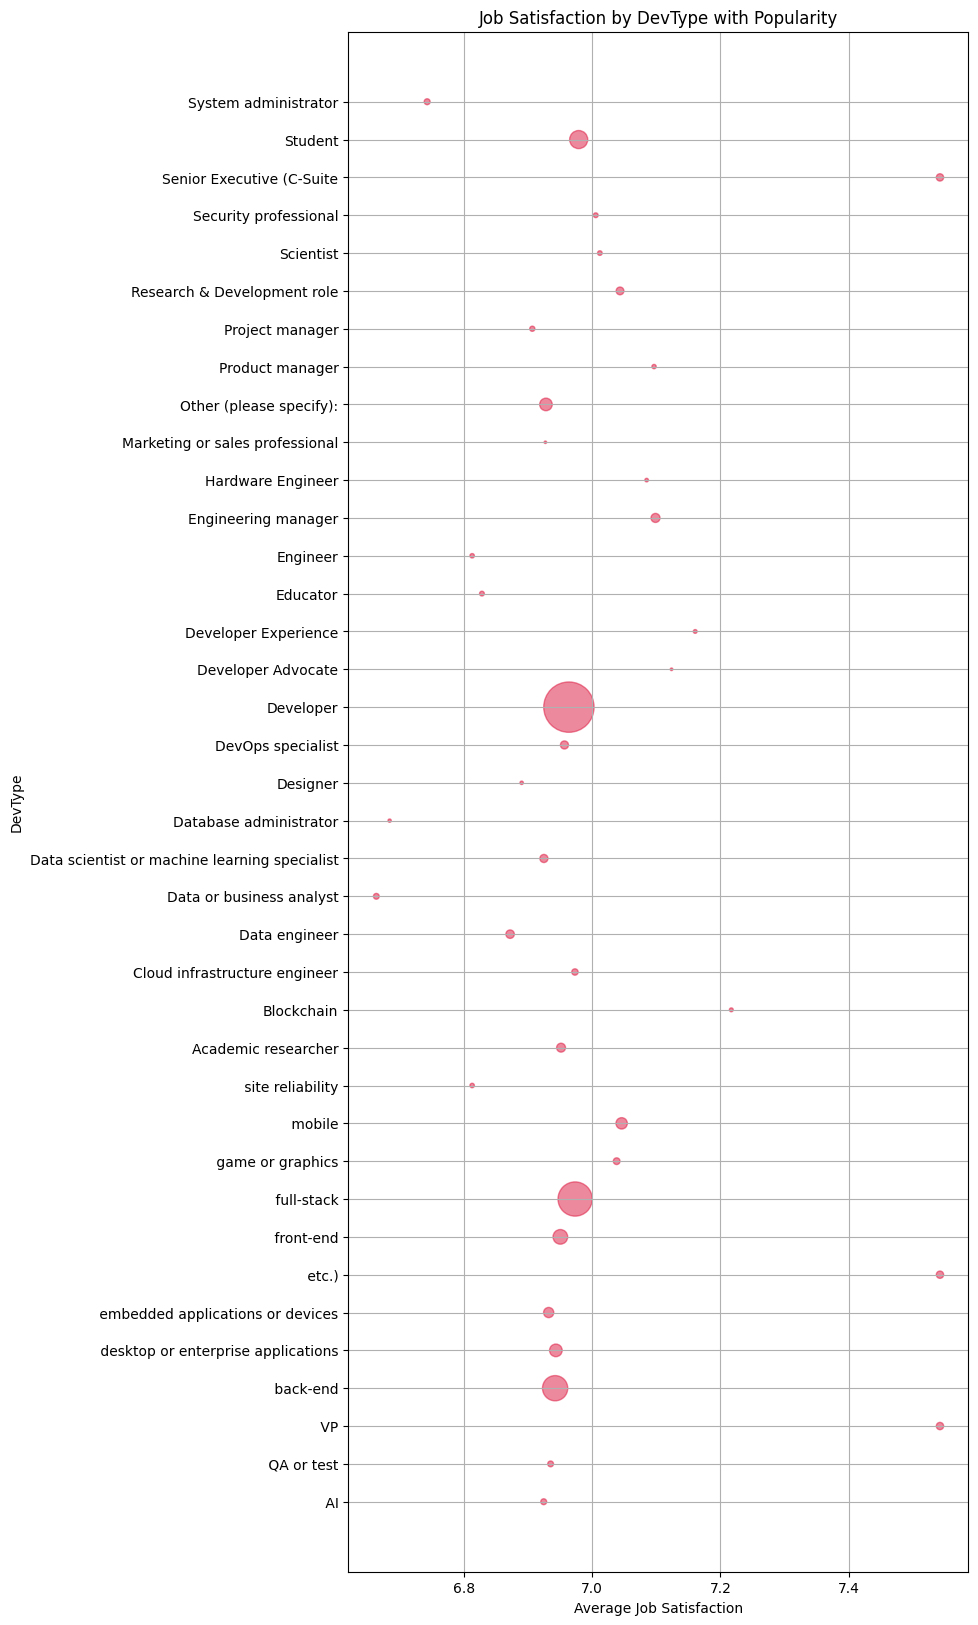

In [34]:
##Write your code here
# Calculate average JobSat for each language
ave_sat = Type_exploded.groupby('DevType')['JobSat'].mean().reset_index()

#  Merge the two DataFrames on the Language column using an outer join
merged_df = pd.merge(ave_sat, Type_popularity, left_on='DevType', right_on='DevType', how='outer')

# Step 3: Create a horizontal bubble plot
plt.figure(figsize=(8, 20))
plt.scatter(merged_df['JobSat'], merged_df['DevType'], 
            s=merged_df['TotalCount'] / 30, alpha=0.5, color='crimson')  # Bubble size scaled by TotalCount
plt.title('Job Satisfaction by DevType with Popularity')
plt.xlabel('Average Job Satisfaction')
plt.ylabel('DevType')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [35]:
##Write your code here
Col_Age = df.loc[:, ['Age', 'NEWCollabToolsHaveWorkedWith', 'Age_numerical']]
Col_Age.sample(20)

,Age,NEWCollabToolsHaveWorkedWith,Age_numerical
11995,45-54 years old,Eclipse;Goland;Vim;Visual Studio Code,49.5
5752,25-34 years old,Visual Studio;Visual Studio Code,29.5
32387,35-44 years old,Emacs;Visual Studio Code,39.5
52511,18-24 years old,NaN,21.0
25700,55-64 years old,Notepad++;Qt Creator,59.5
4168,45-54 years old,Visual Studio;Visual Studio Code,49.5
20982,45-54 years old,Android Studio;Visual Studio Code;Xcode,49.5
41068,35-44 years old,Notepad++;Visual Studio;Visual Studio Code,39.5
49240,Under 18 years old,Notepad++;Sublime Text;Visual Studio,17.0
39877,25-34 years old,Visual Studio Code,29.5


In [36]:
Col_Age.isnull().sum()

Age                                0
NEWCollabToolsHaveWorkedWith    7845
Age_numerical                      0
dtype: int64

In [37]:
Col_Age=Col_Age.dropna(subset=['NEWCollabToolsHaveWorkedWith'])

In [38]:
Col_Age.isnull().sum()

Age                             0
NEWCollabToolsHaveWorkedWith    0
Age_numerical                   0
dtype: int64

In [39]:
# Step 1: Explode the Language combinations into separate rows
Col_Age['NEWCollabToolsHaveWorkedWith'] = Col_Age['NEWCollabToolsHaveWorkedWith'].str.split(';')
Tools_exploded = Col_Age.explode('NEWCollabToolsHaveWorkedWith')

# Step 2: Count language popularity
Tools_popularity = Tools_exploded['NEWCollabToolsHaveWorkedWith'].value_counts().reset_index()
Tools_popularity.columns = ['NEWCollabToolsHaveWorkedWith', 'TotalCount']

# Display the results
print("Exploded DataFrame:")
print(Tools_exploded)
print("\nLanguage Popularity:")
print(Tools_popularity)

Exploded DataFrame:
                   Age NEWCollabToolsHaveWorkedWith  Age_numerical
1      35-44 years old                      PyCharm           39.5
1      35-44 years old           Visual Studio Code           39.5
1      35-44 years old                     WebStorm           39.5
2      45-54 years old                Visual Studio           49.5
4      18-24 years old                          Vim           21.0
...                ...                          ...            ...
65431  45-54 years old                     WebStorm           49.5
65431  45-54 years old                        Xcode           49.5
65435  18-24 years old                          Vim           21.0
65435  18-24 years old           Visual Studio Code           21.0
65436  18-24 years old           Visual Studio Code           21.0

[196236 rows x 3 columns]

Language Popularity:
        NEWCollabToolsHaveWorkedWith  TotalCount
0                 Visual Studio Code       42751
1                      Visual

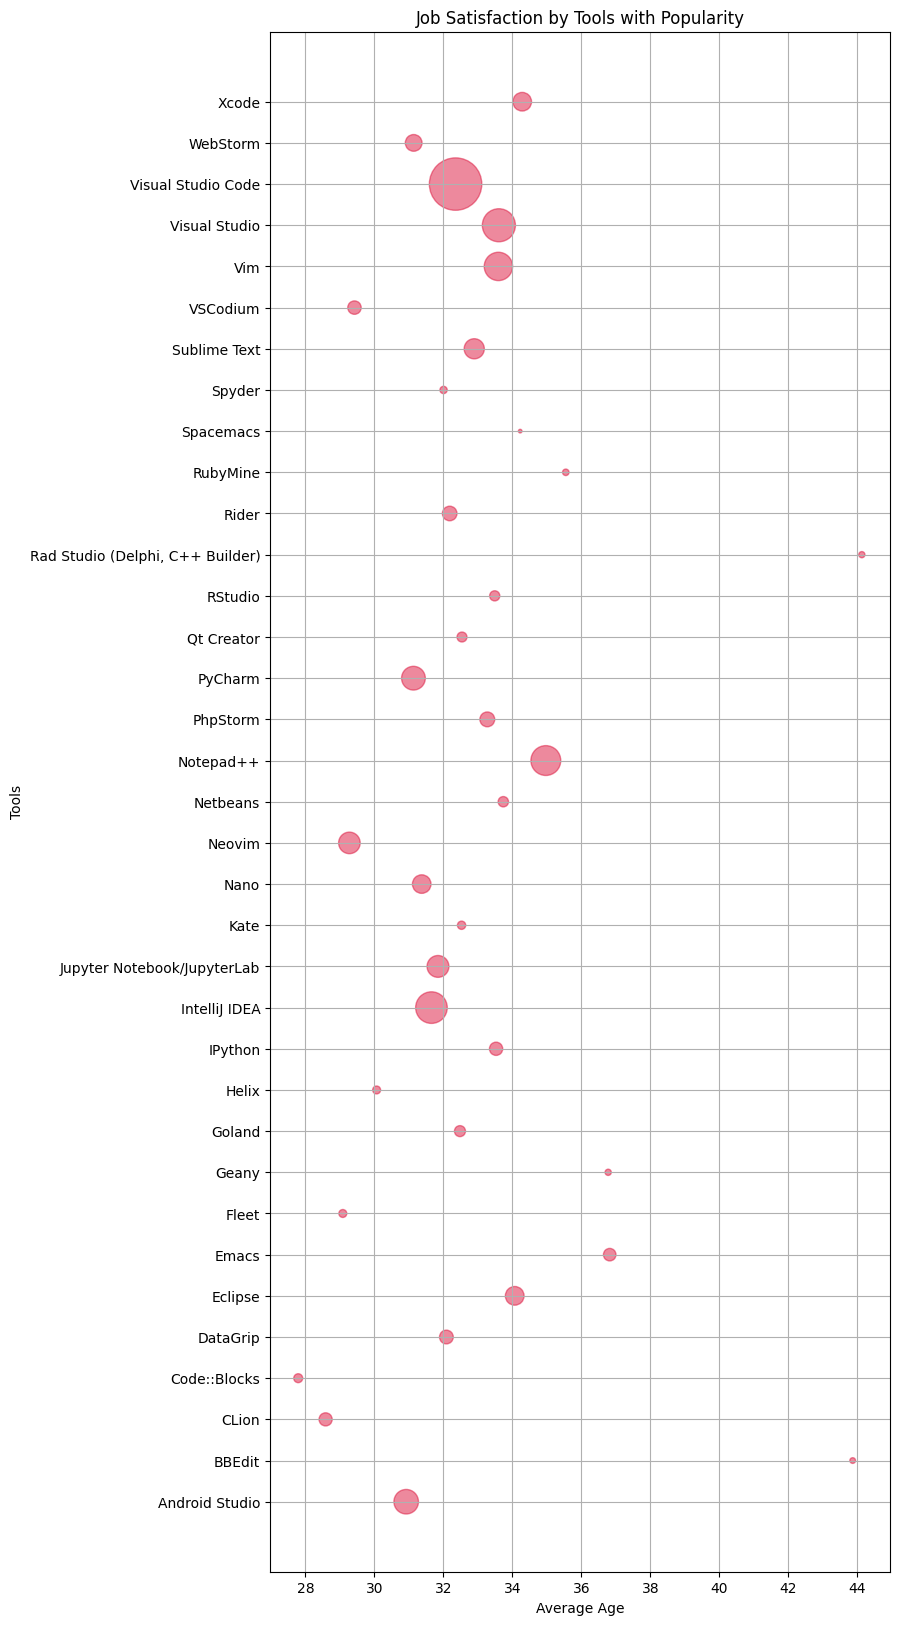

In [40]:
##Write your code here
# Calculate average JobSat for each language
ave_group = Tools_exploded.groupby('NEWCollabToolsHaveWorkedWith')['Age_numerical'].mean().reset_index()

#  Merge the two DataFrames on the Language column using an outer join
merged_df = pd.merge(ave_group, Tools_popularity, left_on='NEWCollabToolsHaveWorkedWith', right_on='NEWCollabToolsHaveWorkedWith', how='outer')

# Step 3: Create a horizontal bubble plot
plt.figure(figsize=(8, 20))
plt.scatter(merged_df['Age_numerical'], merged_df['NEWCollabToolsHaveWorkedWith'], 
            s=merged_df['TotalCount'] / 30, alpha=0.5, color='crimson')  # Bubble size scaled by TotalCount
plt.title('Job Satisfaction by Tools with Popularity')
plt.xlabel('Average Age')
plt.ylabel('Tools')
plt.grid(True)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [41]:
##Write your code here
web_sat = df.loc[:, ['WebframeWantToWorkWith', 'JobSat']]
web_sat.sample(9)

,WebframeWantToWorkWith,JobSat
40932,NaN,9.0
53742,NaN,10.0
32707,NaN,7.0
6570,FastAPI;React;Spring Boot,3.0
27148,Django;FastAPI;Svelte,2.0
10803,Express;Next.js;Node.js;React;Remix,9.0
17505,NaN,7.0
24154,jQuery;Node.js;Nuxt.js;Symfony;Vue.js;WordPress,6.0
38801,NaN,7.0


In [42]:
web_sat.isnull().sum()

WebframeWantToWorkWith    26902
JobSat                        0
dtype: int64

In [43]:
web_data = df['WebframeWantToWorkWith'].value_counts()

# Convert the Series to a DataFrame
web_data_df = web_data.reset_index()

# Rename the columns for clarity
web_data_df.columns = ['WebframeWantToWorkWith', 'Count']

# Display the resulting DataFrame
print(web_data_df)

                                  WebframeWantToWorkWith  Count
0                                                  React    997
1                                            Spring Boot    950
2                                                Node.js    619
3                                           ASP.NET CORE    607
4                                                FastAPI    576
...                                                  ...    ...
11649  Angular;AngularJS;ASP.NET;ASP.NET CORE;jQuery;...      1
11650    Astro;Django;Node.js;React;Ruby on Rails;Vue.js      1
11651   ASP.NET;ASP.NET CORE;Deno;Express;NestJS;Node.js      1
11652    Next.js;Nuxt.js;React;Solid.js;Vue.js;WordPress      1
11653        Angular;Laravel;React;Spring Boot;WordPress      1

[11654 rows x 2 columns]


In [44]:
# Assuming web_data_df has a column named 'SomeColumn' from which you want to take the first value
web_sat.loc[web_sat['WebframeWantToWorkWith'].isna(), 'WebframeWantToWorkWith'] = web_data_df.iloc[0]['WebframeWantToWorkWith']
web_sat.isnull().sum()

WebframeWantToWorkWith    0
JobSat                    0
dtype: int64

In [45]:
web_sat['WebframeWantToWorkWith']

0                                       React
1            Express;Htmx;Node.js;React;Remix
2                                ASP.NET CORE
3                jQuery;Next.js;Node.js;React
4                                       React
                         ...                 
65432                                   React
65433                                   React
65434                                   React
65435                                   React
65436    Django;Express;Next.js;Node.js;React
Name: WebframeWantToWorkWith, Length: 65437, dtype: object

In [46]:
# Step 1: Explode the Language combinations into separate rows
web_sat['WebframeWantToWorkWith'] = web_sat['WebframeWantToWorkWith'].str.split(';')
web_exploded = web_sat.explode('WebframeWantToWorkWith')  # Use web_sat here

# Step 2: Count language popularity
web_popularity = web_exploded['WebframeWantToWorkWith'].value_counts().reset_index()
web_popularity.columns = ['WebframeWantToWorkWith', 'TotalCount']

# Display the results
print("Exploded DataFrame:")
print(web_exploded)
print("\nLanguage Popularity:")
print(web_popularity)

Exploded DataFrame:
      WebframeWantToWorkWith  JobSat
0                      React     7.0
1                    Express     7.0
1                       Htmx     7.0
1                    Node.js     7.0
1                      React     7.0
...                      ...     ...
65436                 Django     7.0
65436                Express     7.0
65436                Next.js     7.0
65436                Node.js     7.0
65436                  React     7.0

[160159 rows x 2 columns]

Language Popularity:
   WebframeWantToWorkWith  TotalCount
0                   React       42306
1                 Node.js       14735
2                 Next.js        8507
3                  Vue.js        7604
4            ASP.NET CORE        6905
5                 Angular        6364
6                 Express        5616
7                  Svelte        5374
8             Spring Boot        5068
9                  Django        4973
10                FastAPI        4914
11                 jQuery      

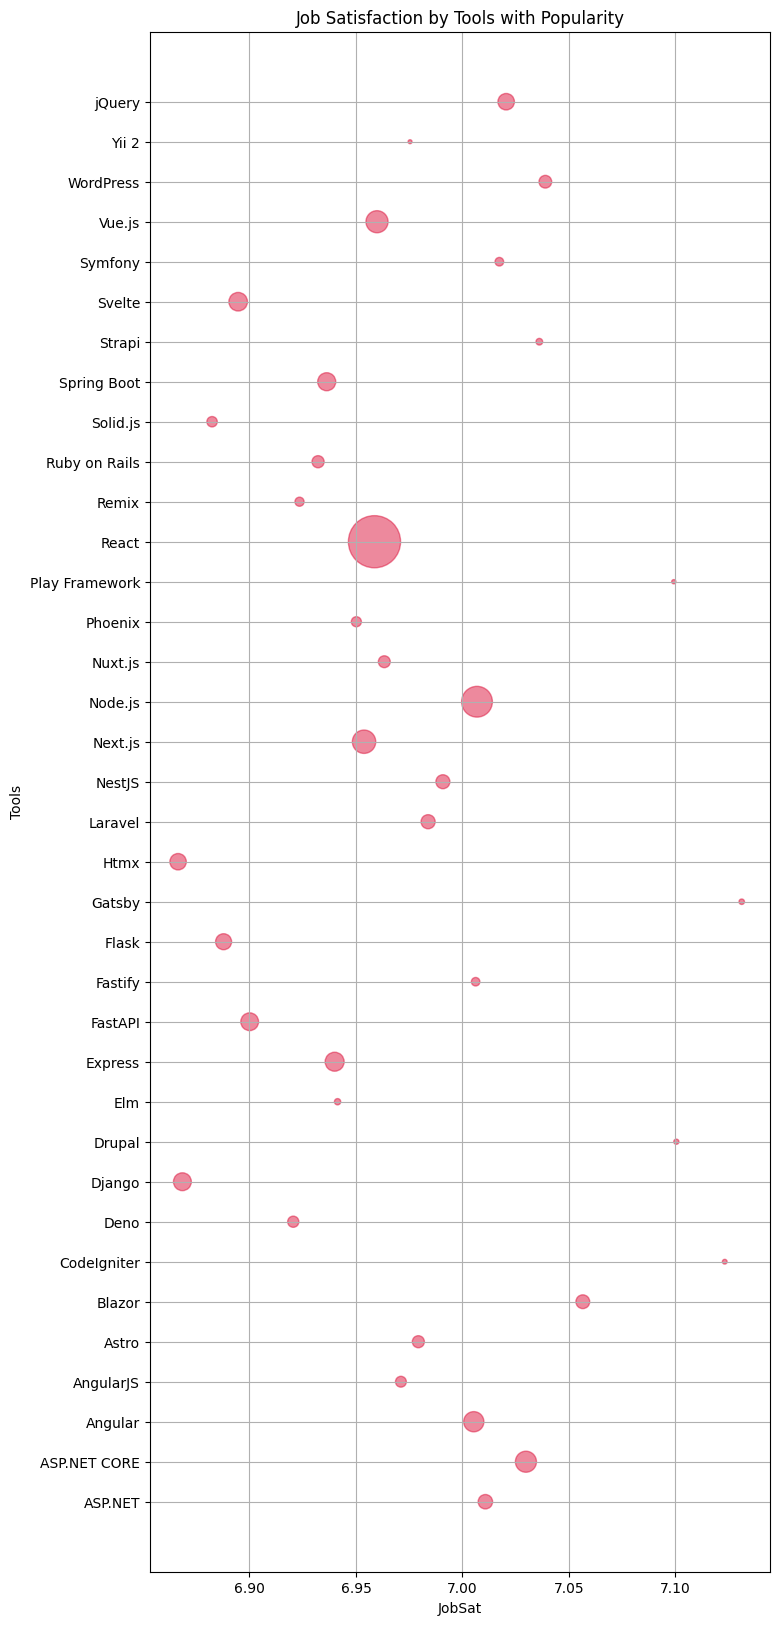

In [47]:
# Step 1: Calculate average JobSat for each language
ave_job = web_exploded.groupby('WebframeWantToWorkWith')['JobSat'].mean().reset_index()  # Change column name here

# Step 2: Merge the two DataFrames on the new column using an outer join
merged_df = pd.merge(ave_job, web_popularity, left_on='WebframeWantToWorkWith', right_on='WebframeWantToWorkWith', how='outer')  # Change column name here

# Step 3: Create a horizontal bubble plot
plt.figure(figsize=(8, 20))
plt.scatter(merged_df['JobSat'], merged_df['WebframeWantToWorkWith'],  # Change column name here
            s=merged_df['TotalCount'] / 30, alpha=0.5, color='crimson')  # Bubble size scaled by TotalCount
plt.title('Job Satisfaction by Tools with Popularity')
plt.xlabel('JobSat')
plt.ylabel('Tools')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [48]:
##Write your code here
df['LanguageAdmired'].describe()

count      50872
unique     12335
top       Python
freq        1555
Name: LanguageAdmired, dtype: object

In [49]:
df['LanguageAdmired'].isnull().sum()

np.int64(14565)

In [50]:
lang_ad_data = df['LanguageAdmired'].value_counts()
lang_ad_data

LanguageAdmired
Python                                                1555
HTML/CSS;JavaScript;TypeScript                        1058
C#                                                     892
Python;SQL                                             669
Java                                                   583
                                                      ... 
GDScript;HTML/CSS;Lua;TypeScript                         1
Bash/Shell (all shells);C++;PowerShell;Python;Rust       1
Go;Python;Ruby;TypeScript                                1
C++;HTML/CSS;Kotlin;Python;SQL;Swift                     1
Bash/Shell (all shells);C++;Go;PowerShell;Python         1
Name: count, Length: 12335, dtype: int64

In [51]:
# Assuming web_data_df has a column named 'SomeColumn' from which you want to take the first value
df.loc[df['LanguageAdmired'].isna(), 'LanguageAdmired'] = "Python"
df['LanguageAdmired'].sample(15)

56687                C#;HTML/CSS;PowerShell;SQL;TypeScript
6812                     C#;JavaScript;PowerShell;Rust;SQL
14086                                                  C++
33154                                           Python;SQL
60158                                               Python
57897                                HTML/CSS;Lua;Rust;SQL
3868                            C#;HTML/CSS;JavaScript;SQL
28112                                          Java;Kotlin
33387    Bash/Shell (all shells);HTML/CSS;Python;Rust;S...
62074                                               Python
26078            Bash/Shell (all shells);C#;C++;JavaScript
58218                                               Python
48627                    Bash/Shell (all shells);Java;Rust
2539     Bash/Shell (all shells);HTML/CSS;JavaScript;Pe...
32962                                               Python
Name: LanguageAdmired, dtype: object

In [52]:
Lang_ad_country=df.loc[:, ['LanguageAdmired', 'Country']]


In [53]:
# Step 1: Explode the Language combinations into separate rows
Lang_ad_country['LanguageAdmired'] = Lang_ad_country['LanguageAdmired'].str.split(';')
Lang_ad_exploded = Lang_ad_country.explode('LanguageAdmired')  # Use web_sat here

# Step 2: Count language popularity
Lang_ad_popularity = Lang_ad_exploded['LanguageAdmired'].value_counts().reset_index()
Lang_ad_popularity.columns = ['LanguageAdmired', 'TotalCount']

# Display the results
print("Exploded DataFrame:")
print(Lang_ad_exploded)
print("\nLanguage Popularity:")
print(Lang_ad_popularity)

Exploded DataFrame:
               LanguageAdmired  \
0                       Python   
1      Bash/Shell (all shells)   
1                           Go   
1                     HTML/CSS   
1                         Java   
...                        ...   
65435                     Rust   
65435                      SQL   
65436               JavaScript   
65436                   Python   
65436               TypeScript   

                                                 Country  
0                               United States of America  
1      United Kingdom of Great Britain and Northern I...  
1      United Kingdom of Great Britain and Northern I...  
1      United Kingdom of Great Britain and Northern I...  
1      United Kingdom of Great Britain and Northern I...  
...                                                  ...  
65435                                            Germany  
65435                                            Germany  
65436                                   

In [57]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_304/3051105861.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


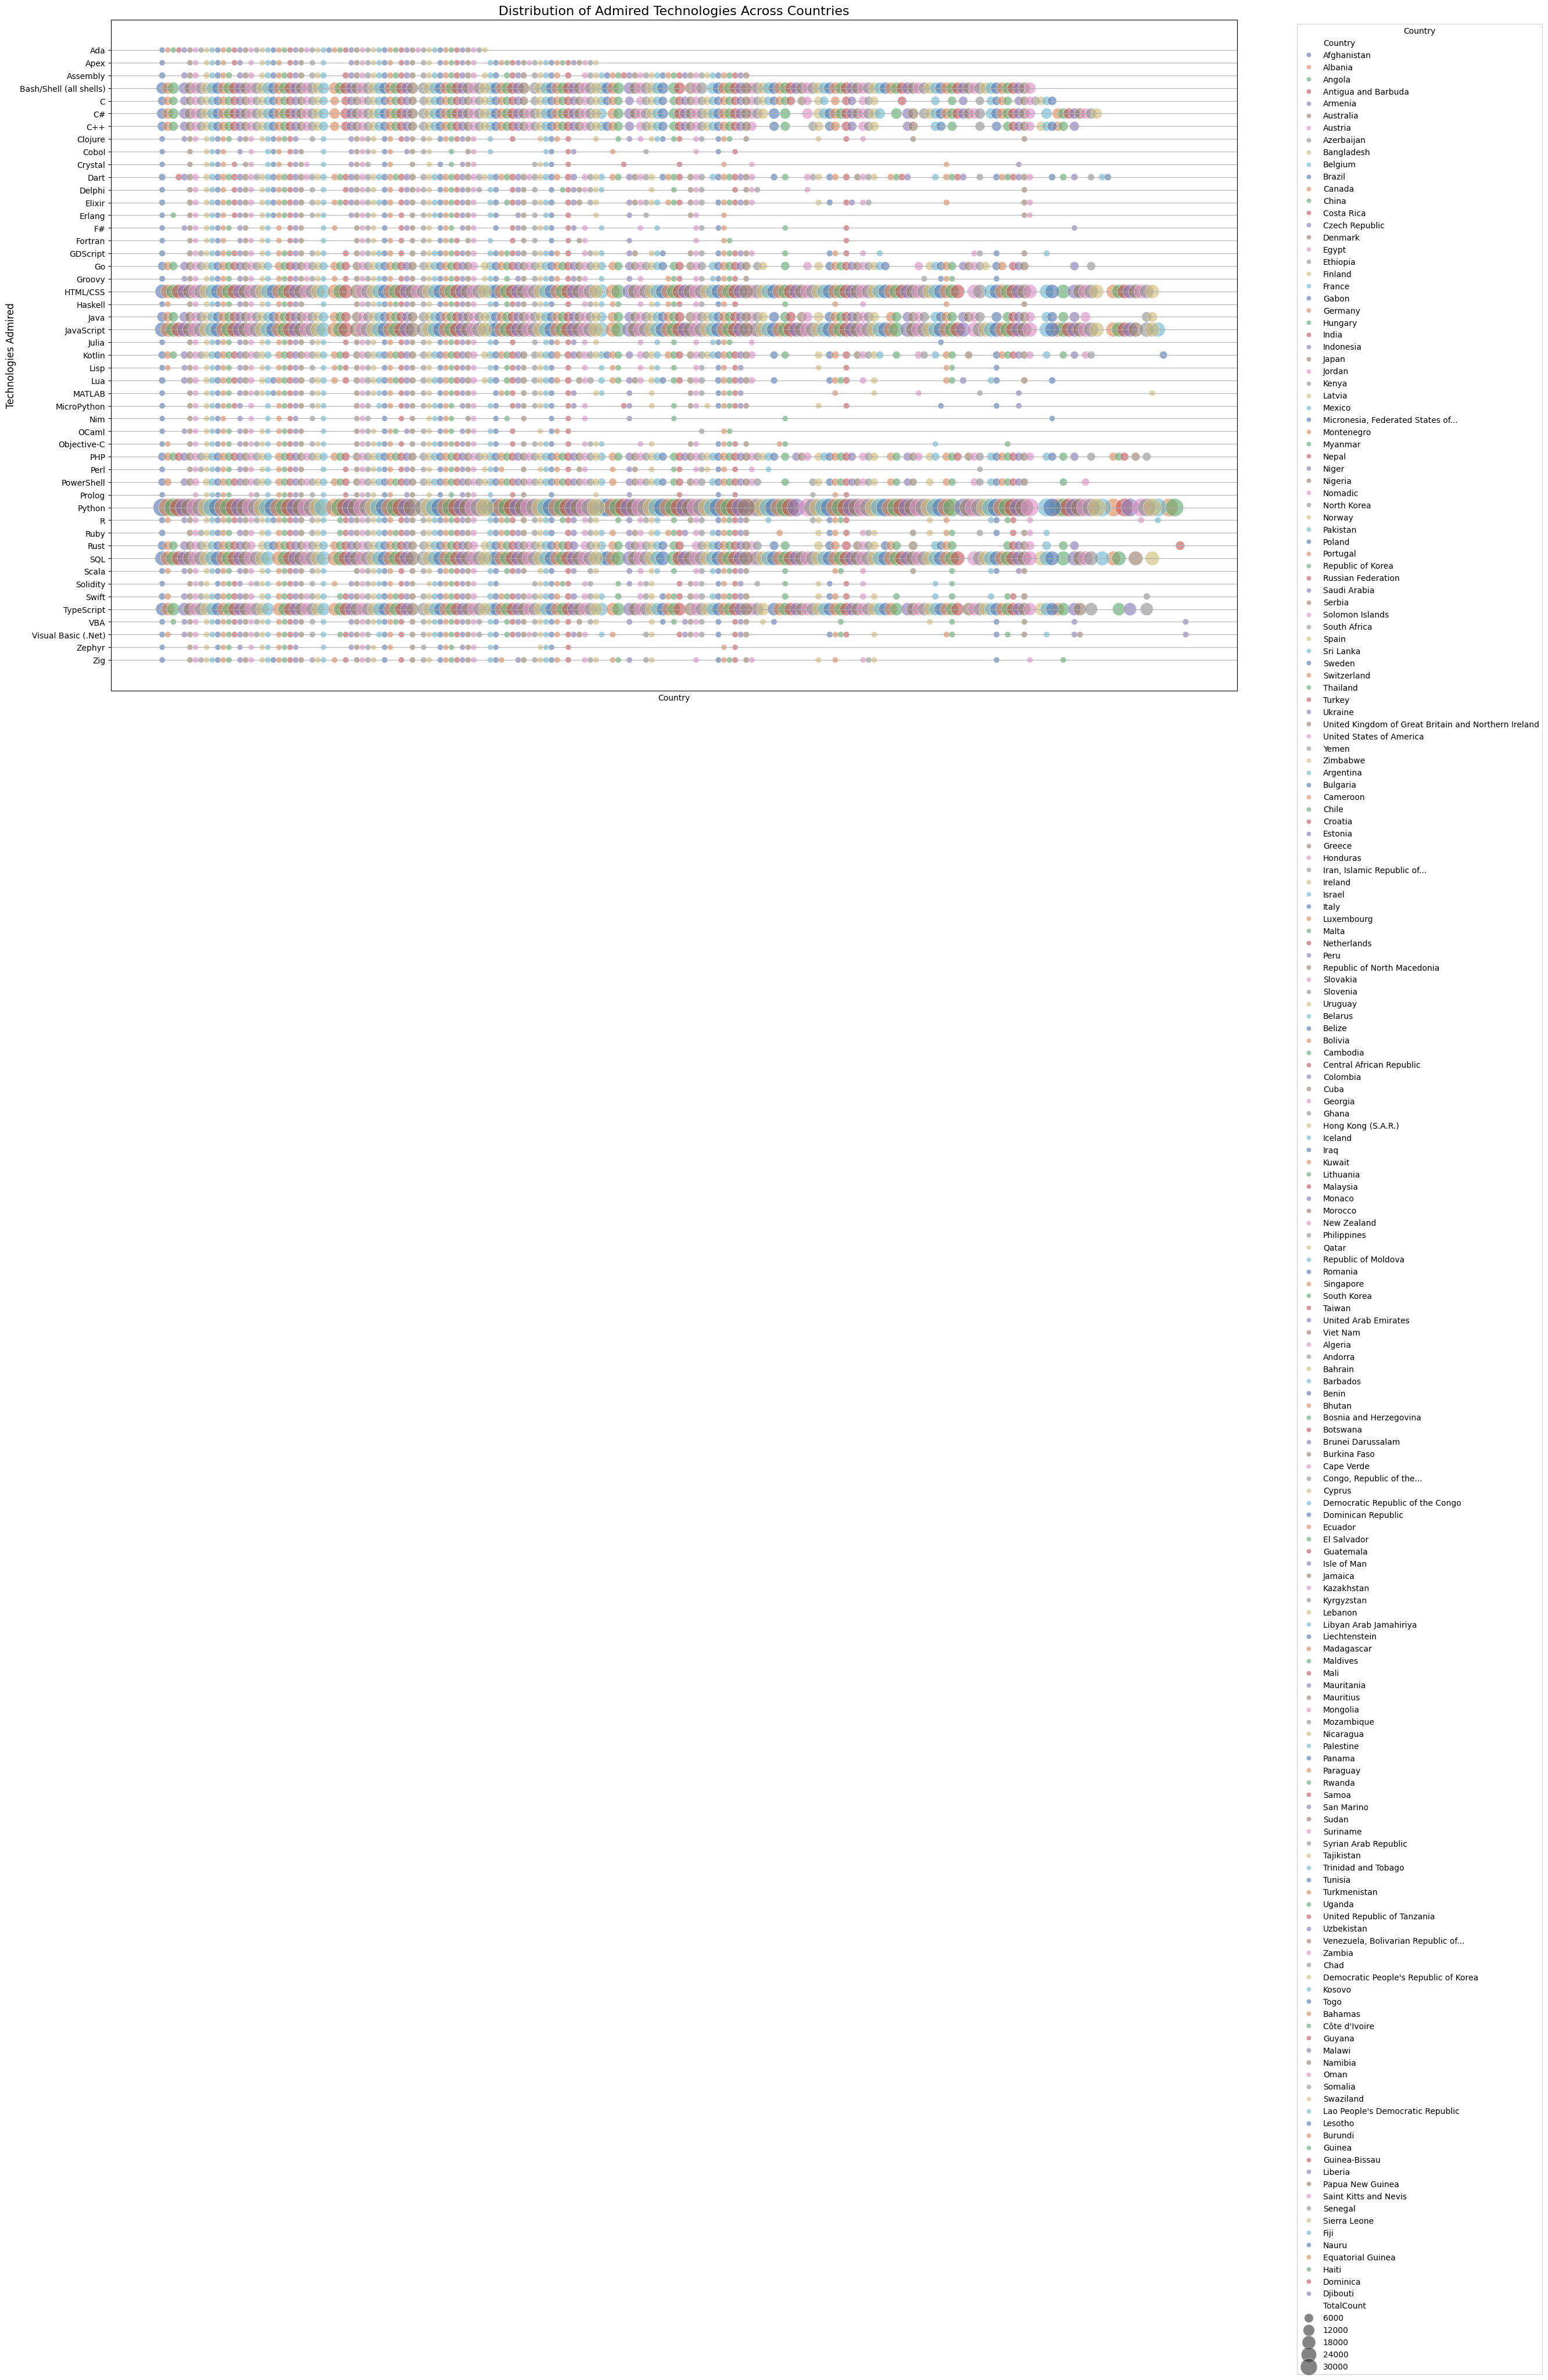

In [66]:
# Step 1: Count the frequency of admiration for each language in each country
frequency_df = Lang_ad_exploded.groupby(['LanguageAdmired', 'Country']).size().reset_index(name='Frequency')

# Step 2: Merge the two DataFrames on LanguageAdmired
merged_df = pd.merge(frequency_df, Lang_ad_popularity, on='LanguageAdmired', how='outer')

# Step 3: Create the bubble plot
plt.figure(figsize=(25, 15))
sns.scatterplot(data=merged_df, 
                x='Country',  # X-axis is Country
                y='LanguageAdmired',  # Y-axis is Language Admired
                size='TotalCount',  # Use TotalCount for bubble size
                sizes=(50, 500),  # Adjust the size range for bubbles
                alpha=0.6, 
                hue='Country',  # Color by Country
                palette='deep')

# Step 4: Customize the plot
plt.title('Distribution of Admired Technologies Across Countries', fontsize=16)
plt.ylabel('Technologies Admired', fontsize=12)

# Remove country names from x-axis
plt.xticks([])  # Set x-ticks to an empty list to remove them

plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
